# PROJECT 4
**MOD510: Mandatory project 4**  
**Deadline: 14. December 2024**


Authors:  
*Dea Lana Asri*  
*Sander Øydal Sterri*  
*Urszula Maria Starowicz*  

**ABSTRACT**  
  
This project focuses on two exercises related to stochastic modeling and its applications in environmental engineering. The first exercise involves the stochastic modeling of interconnected mixing tanks. Using Monte Carlo methods, the exercise models uncertainty in the system's behavior, starting with a single tank and expanding to a three-tank system. The results are compared with ordinary differential equation (ODE) solutions to validate the stochastic approach. The analysis reveals that the Monte Carlo simulations align closely with the deterministic ODE results,demonstrating the accuracy and reliability of the stochastic method for this application. The advantages and limitations of stochastic solution and analytical solutions are also discussed.

The second exercise applies a 2D random walk model to simulate the spread of contaminants in underground aquifers. This model mimics the diffusion process of contaminants and helps estimate the time required for the contaminant to reach specific distances under both worst-case and realistic scenarios. By modifying movement probabilities, the model also simulates the effects of groundwater flow on contaminant transport. The exercise compares the contamination risks in unbiased versus biased random walks. These findings provide valuable insights for environmental risk assessment and engineering decision-making.


**INTRODUCTION**  
  
In the first part we are tackling the issue of mixing tanks, which is essential in various engineering applications (in chemical and environmental engineering to model processes such as chemical reactions, heat transfer or pollutant dispersion). This exercise focuses on applying stochastic modeling techniques to a system of interconnected mixing tanks, leveraging Monte Carlo methods to simulate uncertainty in the system's behavior. Starting with a single tank, the model will be progressively expanded to include a system of three interconnected tanks, incorporating uncertainty estimation and validating results through comparison with ordinary differential equation (ODE) solutions.  
  
In the second part, we use a 2D random walk model to simulate the spread of contaminants in an aquifer, which can help assess the contamination risk at varying distances from the source. The model assumes that contaminants move in random directions over time, mimicking the unpredictable movement of particles in groundwater. By modeling the contaminant's spread, we aim to evaluate both worst-case and more realistic scenarios for contamination reaching specific distances from the source. The study first investigates the minimum time required for a contaminant to reach 10 km from the source under a worst-case scenario. It then explores the likely time for contaminants to spread 10 km, assuming a consistent rate of movement. Lastly, the model introduces a bias in the movement probabilities, simulating real-world conditions like groundwater flow, and compares the spread under biased and unbiased conditions. This analysis provides insight into the behavior of contaminants in aquifers and their potential impact over time.

In [8]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.random import Generator, PCG64
import pandas as pd
import seaborn as sns

### Exercise 1: Stochastic modeling of mixing tanks  

**Part 1**  

The governing equation is:

$$
\frac{dC}{dt} + \frac{Q_{out}}{V}C = \frac{Q_{in}}{V}C_{in}
$$

This is a first-order linear ODE. Using the integrating factor method:

---

### Integrating Factor

Let the integrating factor:

$$
\mu(t) = e^{\int \frac{Q_{out}}{V} dt} = e^{\frac{Q_{out}}{V}t}
$$

Multiplying through by $ \mu(t) $:

$$
e^{\frac{Q_{out}}{V}t} \frac{dC}{dt} + e^{\frac{Q_{out}}{V}t} \frac{Q_{out}}{V}C = e^{\frac{Q_{out}}{V}t} \frac{Q_{in}}{V}C_{in}
$$

---

### Simplification

The left-hand side simplifies to:

$$
\frac{d}{dt}\left(C e^{\frac{Q_{out}}{V}t}\right) = e^{\frac{Q_{out}}{V}t} \frac{Q_{in}}{V}C_{in}
$$

---

### Integration

Integrating both sides:

$$
C e^{\frac{Q_{out}}{V}t} = \int e^{\frac{Q_{out}}{V}t} \frac{Q_{in}}{V}C_{in} dt
$$

Assuming $ C_{in} $ is constant:

$$
C e^{\frac{Q_{out}}{V}t} = \frac{Q_{in}}{V}C_{in} \int e^{\frac{Q_{out}}{V}t} dt = \frac{Q_{in}}{Q_{out}}C_{in} e^{\frac{Q_{out}}{V}t} + K
$$

---

### Solution for $ C(t) $

Rearranging for $ C(t) $:

$$
C(t) = C_{\infty} + (C_0 - C_{\infty}) e^{-\frac{Q_{out}}{V}t}
$$

Where:

$$
C_{\infty} = \frac{Q_{in}}{Q_{out}} C_{in} \quad \text{(steady-state concentration)}
$$

$$
C_0 \quad \text{is the initial concentration at \( t = 0 \)}.
$$


The probability of a gram of fluid to leave the tank over a given time interval $\Delta t$ is:

$$
p = 1 - e^{-\frac{Q_{out}}{V} \Delta t}
$$

---

### Explanation

- $Q_{out}$: The outflow rate (in $\text{grams/second}$).
- $V$: The volume of the tank (in $\text{grams}$).
- $\Delta t$: The time interval (in $\text{seconds}$).

The formula is derived from the exponential decay model, where the outflow probability increases with time and outflow rate, and decreases with the tank volume. It ensures that the probability is always between 0 and 1.


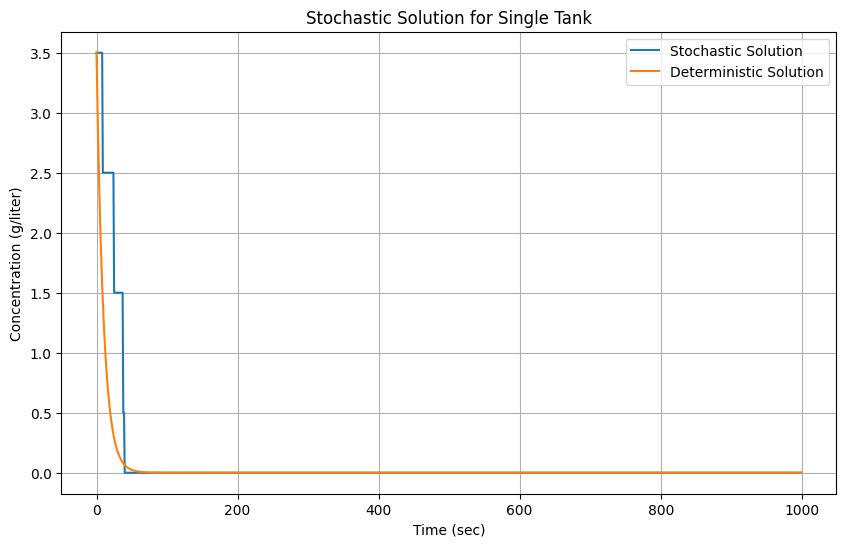

In [9]:
# Define the known values
V = 1000 # Volume of the tank (liters)
Q_in = Q_out = 100 # Inflow and outflow rate (liters/sec)
C_in = 0 # Solute concentration in the inflow (g/liter)
C_0 = 3.5 # Initial solute concentration in the tank (g/liter)
time_steps = 1000 # Number of time steps
dt = 1 # Time step (sec)

np.random.seed(1234) #for reproducibility

# Probability of a gram of fluid leaving the tank
p = 1-np.exp(-Q_out*dt/V)

# Initialize array to store value of C at each time step
C_values = np.zeros(time_steps)
C_values[0] = C_0

# Loop through each time step
for i in range(1, time_steps):
    # Simulate the probability of a gram of fluid leaving the tank
    leaving = np.random.choice([0, 1], p=[1 - p, p])
    if leaving == 1:
        if C_values[i-1] < 1:
            remaining_fraction = 0
        else:
            remaining_fraction = (C_values[i-1]-1)/C_values[i-1]
    else:
        remaining_fraction = 1
    # Update the concentration in the tank
    C_values[i] = C_values[i-1] * remaining_fraction


time = np.arange(0, (time_steps)*dt, dt)

# Plot the concentration over time
plt.figure(figsize=(10, 6))
plt.plot(time, C_values, label='Stochastic Solution')
plt.plot(time, C_0*np.exp(-Q_out*time/V), label='Deterministic Solution')
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (g/liter)')
plt.title('Stochastic Solution for Single Tank')
plt.legend()
plt.grid()
plt.show()

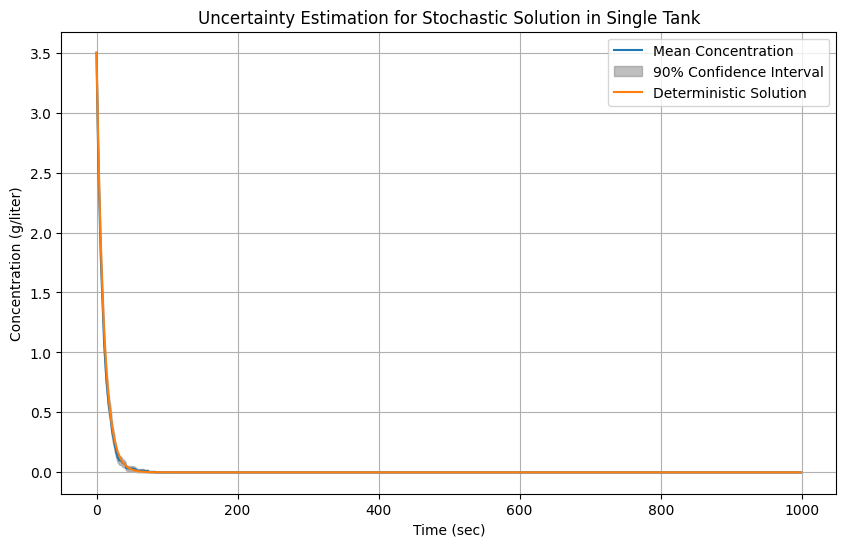

In [10]:
# Run multiple simulations to estimate the expected value of C at each time step
num_simulations = 1000

np.random.seed(1234) #for reproducibility

# Initialize array to store the concentration values for each simulation
C_values_all = np.zeros((num_simulations, time_steps))

for i in range(num_simulations):
    # Initialize array to store value of C_0 for each simulation
    C_values_all[i, 0] = C_0 

    # Loop through each time step
    for j in range(1, time_steps):
        #initiate c values
        C_values = np.zeros(time_steps)
        # Simulate the probability of a gram of fluid leaving the tank
        leaving = np.random.choice([0, 1], p=[1 - p, p])
        if leaving == 1:
            if C_values[i-1] < 1:
                remaining_fraction = 0
            else:
                remaining_fraction = (C_values[i-1]-1)/C_values[i-1]
        else:
            remaining_fraction = 1
        # Update the concentration in the tank
        C_values_all[i, j] = C_values_all[i, j-1] * remaining_fraction

# Calculate mean and standard deviation of the concentration values at each time step
mean_C_values = np.mean(C_values_all, axis=0)
std_C_values = np.std(C_values_all, axis=0)

# Calculate the 95% confidence interval
upper_bound = mean_C_values + 1.96 * std_C_values / np.sqrt(num_simulations)
lower_bound = mean_C_values - 1.96 * std_C_values / np.sqrt(num_simulations)

# Generate the plot
time = np.arange(0, (time_steps)*dt, dt)

# Plot the mean concentration over time
plt.figure(figsize=(10, 6))
plt.plot(time, mean_C_values, label='Mean Concentration')
plt.fill_between(time, lower_bound, upper_bound, color='gray', alpha=0.5, label='90% Confidence Interval')
plt.plot(time, C_0*np.exp(-Q_out*time/V), label='Deterministic Solution')
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (g/liter)')
plt.title('Uncertainty Estimation for Stochastic Solution in Single Tank')
plt.legend()
plt.grid()
plt.show()


From the plot above, we can see that the deterministic solution is a smooth function of time. Meanwhile the stochastic solution represents average concentration across multiple simulations. The Stochastic Solution follows the deterministic solution closely which shows that the stochastic solutions aligns well with the deterministic solution.  
Both solutions show that the concentrations decay to 0 g/liter as time goes to infinity, which is expected as the inflow concentration is 0 g/liter.

**Part 2**  

### Governing Equations for Solute Concentrations in Three Tanks

We start by defining the equations governing the solute concentrations $ C_1 $, $ C_2 $, and $ C_3 $ in the three tanks. 

#### Given Parameters:
- $ V $: Tank volume $1000$ liters,
- $ Q_{\text{in}} = Q_{\text{out}} = 100, \text{liters/second} $ (equal inflow and outflow rates),
- $ C_{\text{in}} = 0 \, \text{g/L} $ (solute concentration of inflowing fluid),
- Initial concentrations: 
  $$
  C_1(0) = 3.5 \, \text{g/L}, \quad 
  C_2(0) = 0 \, \text{g/L}, \quad 
  C_3(0) = 0 \, \text{g/L}.
  $$

#### Governing Equations:
1. For \( C_1 \):
   $$
   \frac{dC_1}{dt} = \frac{Q_{\text{in}}}{V} C_{\text{in}} - \frac{Q_{\text{out}}}{V} C_1 = -\frac{Q_{\text{out}}}{V} C_1
   $$

2. For \( C_2 \):
   $$
   \frac{dC_2}{dt} = \frac{Q_{\text{in}}}{V} C_1 - \frac{Q_{\text{out}}}{V} C_2
   $$

3. For \( C_3 \):
   $$
   \frac{dC_3}{dt} = \frac{Q_{\text{in}}}{V} C_2 - \frac{Q_{\text{out}}}{V} C_3
   $$


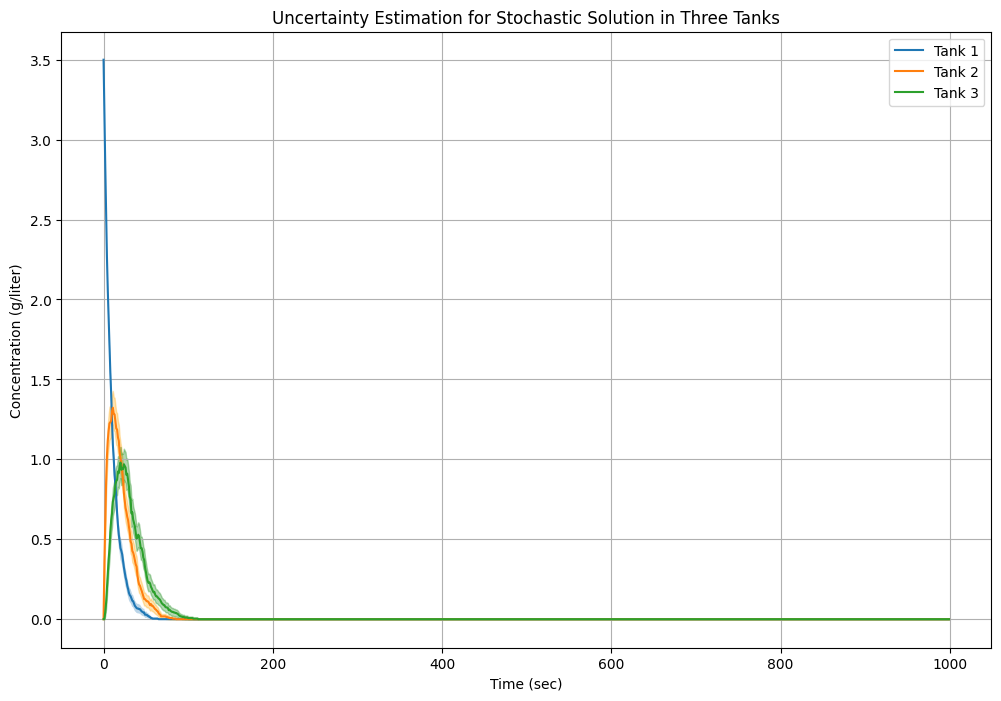

In [11]:
# Define the known values
V = 1000 # Volume of the tank (liters)
Q_in = Q_out = 100 # Inflow and outflow rate (liters/sec)
C_in = 0 # Solute concentration in the inflow (g/liter)
C1_0 = 3.5 # Initial solute concentration in the tank (g/liter)
C2_0 = 0 # Initial solute concentration in the second tank (g/liter)
C3_0 = 0 # Initial solute concentration in the third tank (g/liter)
time_steps = 1000 # Number of time steps
dt = 1 # Time step (sec)
num_simulations = 1000 # Number of simulations

np.random.seed(1234) #for reproducibility

# Probability of a gram of fluid leaving the tank
p = 1-np.exp(-Q_out*dt/V)

# Initialize array to store values of C at each time step for all simulations
C_values = np.zeros((num_simulations, 3, time_steps))
C_values[:, 0, 0] = C1_0  # Initial concentration in Tank 1
C_values[:, 1, 0] = C2_0  # Initial concentration in Tank 2
C_values[:, 2, 0] = C3_0  # Initial concentration in Tank 3

np.random.seed(1234) #for reproducibility

for i in range(num_simulations):
    for j in range(1, time_steps):
        # Tank 1
        if C_values[i, 0, j-1] > 0:
            grams_leaving_1 = np.random.choice([0, C_values[i, 0, j-1] * V], p=[1 - p, p])
        else:
            grams_leaving_1 = 0
        C_values[i, 0, j] = max(0, C_values[i, 0, j-1] - grams_leaving_1 / V)
        
        # Tank 2
        if C_values[i, 1, j-1] > 0:
            grams_leaving_2 = np.random.choice([0, C_values[i, 1, j-1] * V], p=[1 - p, p])
        else:
            grams_leaving_2 = 0
        C_values[i, 1, j] = max(0, C_values[i, 1, j-1] + grams_leaving_1 / V - grams_leaving_2 / V)
        
        # Tank 3
        if C_values[i, 2, j-1] > 0:
            grams_leaving_3 = np.random.choice([0, C_values[i, 2, j-1] * V], p=[1 - p, p])
        else:
            grams_leaving_3 = 0
        C_values[i, 2, j] = max(0, C_values[i, 2, j-1] + grams_leaving_2 / V - grams_leaving_3 / V)

        
    
# Statistical analysis for each tank
#initialize arrays to store mean, std, and confidence intervals for each tank
mean_tank = np.zeros((3, time_steps))
std_tank = np.zeros((3, time_steps))
conf_low_tank = np.zeros((3, time_steps))
conf_high_tank = np.zeros((3, time_steps))

for i in range(3):
    mean_tank[i,:] = np.mean(C_values[:, i, :], axis=0)
    std_tank[i,:] = np.std(C_values[:, i, :], axis=0)
    conf_low_tank[i,:] = mean_tank[i,:] - 1.96 * std_tank[i,:] / np.sqrt(num_simulations)
    conf_high_tank[i,:] = mean_tank[i,:] + 1.96 * std_tank[i,:] / np.sqrt(num_simulations)

# Generate the plot
time = np.arange(0, (time_steps)*dt, dt)
plt.figure(figsize=(12, 8))
plt.plot(time, mean_tank[0,:], label='Tank 1')
plt.fill_between(time, conf_low_tank[0,:], conf_high_tank[0,:], alpha=0.3)
plt.plot(time, mean_tank[1,:], label='Tank 2')
plt.fill_between(time, conf_low_tank[1,:], conf_high_tank[1,:], color='orange', alpha=0.3)
plt.plot(time, mean_tank[2,:], label='Tank 3')
plt.fill_between(time, conf_low_tank[2,:], conf_high_tank[2,:], color='green', alpha=0.3)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (g/liter)')
plt.title('Uncertainty Estimation for Stochastic Solution in Three Tanks')
plt.legend()
plt.grid()
plt.show()

Tank 1 starts with a concentration of 3.5 g/L, while Tank 2 and Tank 3 both begin with 0 g/L, and the inflow concentration is also 0 g/L. From the plot above, we observe that the concentration in Tank 1 decays from 3.5 g/L to 0 g/L as time approaches infinity. Meanwhile, Tank 2 and Tank 3 start at 0 g/L, with their concentrations increasing as they receive the outflow from the preceding tanks. A delayed peak is evident in both Tank 2 and Tank 3, reflecting their dependency on the dynamics of the upstream tanks.

Looking at the confidence intervals for each tank, we notice that uncertainty is highest during periods of rapid concentration changes, such as the peaks in Tank 2 and Tank 3. As the system approaches a steady-state condition, variability diminishes, and the confidence intervals become narrower.

**Part 3**

### Analytical Solution

The equations describe a linear system with constant coefficients. The solutions involve exponential terms. Solving them sequentially:

#### Tank 1:

$$
C_1(t) = C_1(0) e^{-\frac{Q_{out}}{V} t}
$$

#### Tank 2:

Substitute $ C_1(t) $ into $ \frac{dC_2}{dt} $:

$$
\frac{dC_2}{dt} + \frac{Q_{out}}{V} C_2 = \frac{Q_{in}}{V} C_1(0) e^{-\frac{Q_{out}}{V} t}
$$

Using the integrating factor $ \mu(t) = e^{\frac{Q_{out}}{V} t} $, we find:

$$
C_2(t) = C_1(0) \frac{V}{Q_{out}} \left( 1 - e^{-\frac{Q_{out}}{V} t} \right)
$$

#### Tank 3:

Similarly, substitute $ C_2(t) $ into $ \frac{dC_3}{dt} $ and solve:

$$
C_3(t) = C_1(0) \frac{2V}{Q_{out}} \left( 1 - 2e^{-\frac{Q_{out}}{V} t} + e^{-2\frac{Q_{out}}{V} t} \right)
$$


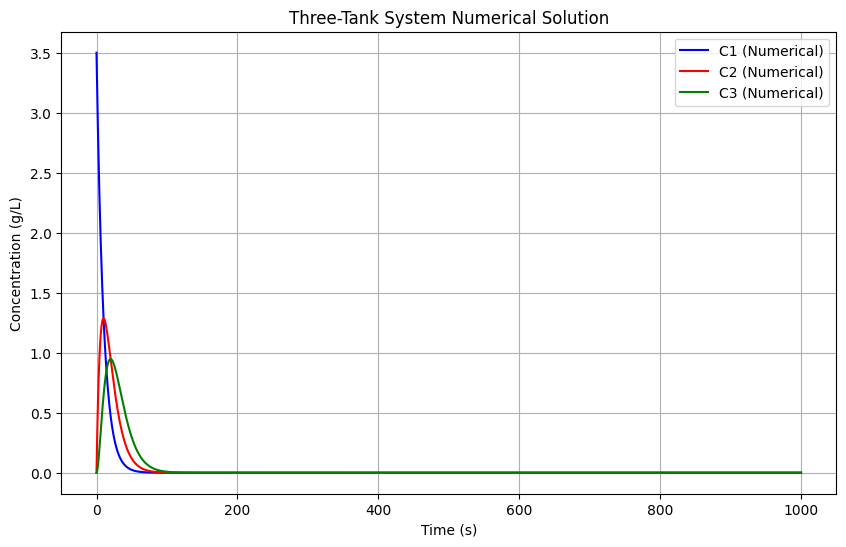

In [12]:
# Constants
V = 1000  # liters
Q = 100  # liters/second
C1_0, C2_0, C3_0 = 3.5, 0, 0  # Initial conditions

# Define ODE system
def tank_system(t, C):
    C1, C2, C3 = C
    dC1_dt = -Q / V * C1
    dC2_dt = Q / V * (C1 - C2)
    dC3_dt = Q / V * (C2 - C3)
    return [dC1_dt, dC2_dt, dC3_dt]

# Time span
t_span = (0, 1000)
t_eval = np.linspace(*t_span, 1000)

# Solve numerically
sol = solve_ivp(tank_system, t_span, [C1_0, C2_0, C3_0], t_eval=t_eval)

# Extract solutions
C1_num, C2_num, C3_num = sol.y

# Plot numerical solutions
plt.figure(figsize=(10, 6))
plt.plot(t_eval, C1_num, 'b-', label="C1 (Numerical)")
plt.plot(t_eval, C2_num, 'r-',label="C2 (Numerical)")
plt.plot(t_eval, C3_num, 'g-',label="C3 (Numerical)")
plt.title("Three-Tank System Numerical Solution")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (g/L)")
plt.legend()
plt.grid()
plt.show()


Comparing the stochastic solution with the analytical solution for each tank, we got:

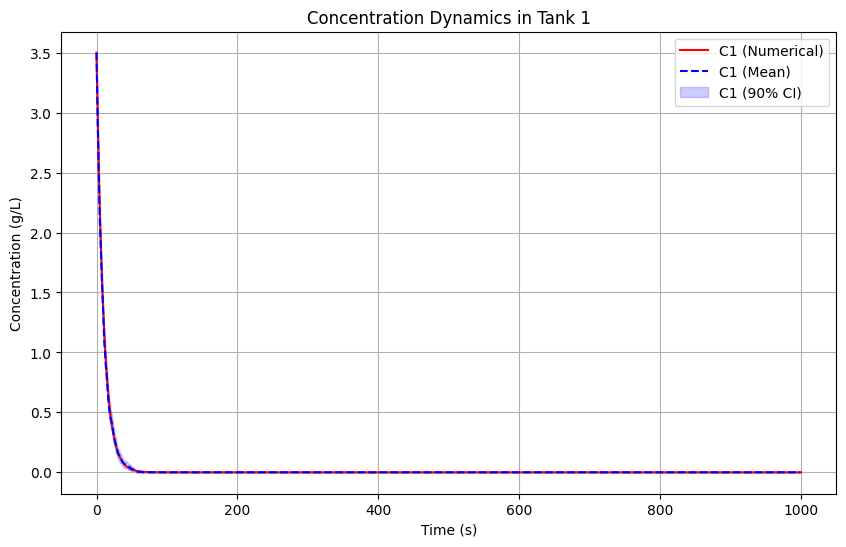

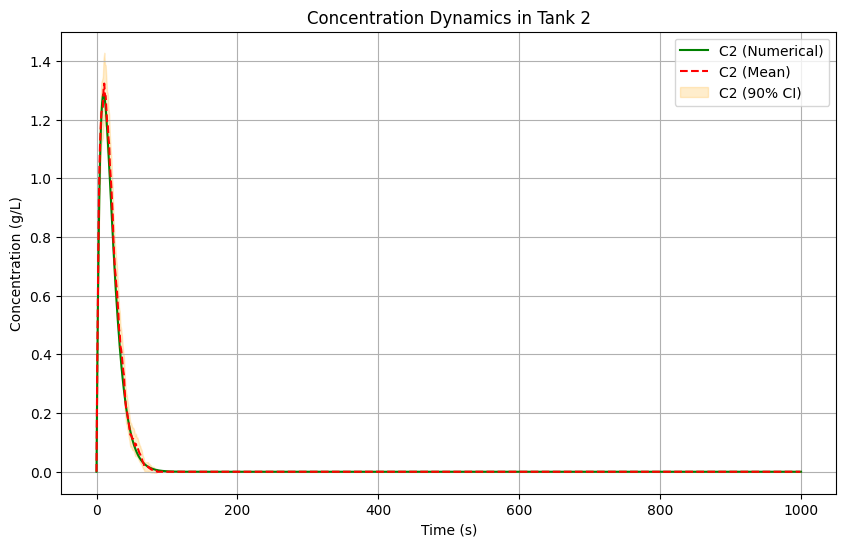

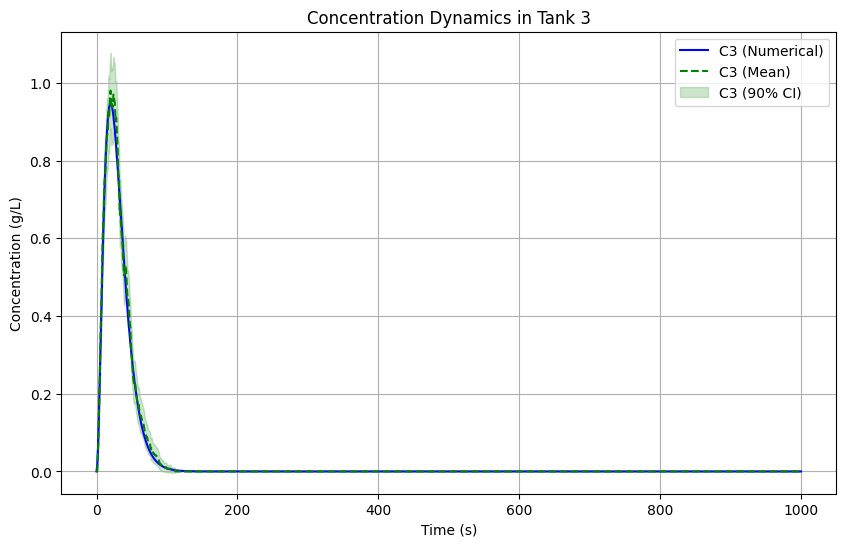

In [13]:
# Plot for Tank 1
plt.figure(figsize=(10, 6))
plt.plot(t_eval, C1_num, 'r-', label="C1 (Numerical)")
plt.plot(time, mean_tank[0], 'b--', label="C1 (Mean)")
plt.fill_between(time, conf_low_tank[0], conf_high_tank[0], color='blue', alpha=0.2, label="C1 (90% CI)")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (g/L)")
plt.title("Concentration Dynamics in Tank 1")
plt.legend()
plt.grid()
plt.show()

# Plot for Tank 2
plt.figure(figsize=(10, 6))
plt.plot(t_eval, C2_num, 'g-', label="C2 (Numerical)")
plt.plot(time, mean_tank[1], 'r--', label="C2 (Mean)")
plt.fill_between(time, conf_low_tank[1], conf_high_tank[1], color='orange', alpha=0.2, label="C2 (90% CI)")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (g/L)")
plt.title("Concentration Dynamics in Tank 2")
plt.legend()
plt.grid()
plt.show()

# Plot for Tank 3
plt.figure(figsize=(10, 6))
plt.plot(t_eval, C3_num, 'b-', label="C3 (Numerical)")
plt.plot(time, mean_tank[2], 'g--', label="C3 (Mean)")
plt.fill_between(time, conf_low_tank[2], conf_high_tank[2], color='green', alpha=0.2, label="C3 (90% CI)")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (g/L)")
plt.title("Concentration Dynamics in Tank 3")
plt.legend()
plt.grid()
plt.show()

From the plots above, we can see that the stochastic solutions align well with the analytical solutions for all three tanks, indicating that the stochastic model accurately captures the expected behavior. Although the average concentration in the tanks closely follows the deterministic solution, the stochastic solutions reveal variability in the concentrations, as reflected by the confidence intervals. This variability is particularly noticeable during the peaks in Tank 2 and Tank 3. Computational Efficiency wise, the stochastic model requires more computational resources compared to the analytical model, as it involves multiple simulations to estimate the average concentration and confidence intervals ([Goicoechea, 2023](#stochastic)).  

The advantages of using Monte Carlo compared to analytical solutions are:
1. Monte Carlo methods provide confidence intervals, allowing for a better understanding of variability in the system ([Walter, 2015](#walter))
2. Monte Carlo methods provides an approximation of the solution with variability whereas the analytical solution ignore randomness and might oversimplify the real world scenario ([Walter, 2015](#walter))

But the limitations are:
1. Monte Carlo methods require more computational resources as it involves large number of simulations ([Goicoechea, 2023](#stochastic))
2. Monte Carlo Methods does not provide an exact solution, but rather an approximation of the solution ([Walter, 2015](#walter))

##  Exercise 2: Spreading of contaminants in under ground aquifers using random walk  
  
**Part 1**  
  
Basic Model:  

In [14]:
class RandomWalk:
    
    def __init__(self, init_x = 1000, init_y = 1000, N = 1000, boundary = 2000, threshold = 1000, seed = 1):
        self.init_x = init_x
        self.init_y = init_y
        self.boundary = boundary
        self.threshold = threshold
        self.seed = seed
        self.x = np.full(N, init_x)
        self.y = np.full(N, init_y)
        self.rng = Generator(PCG64(seed))
        self.movement_dir = [(0,0), (0,1), (1,0), (1,1), (-1, 0), 
                             (0,-1), (-1,-1), (1,-1), (-1,1)]
        self.probabilities = [0.1, 0.2, 0.1, 0.15, 0.2, 0.05, 0.05, 0.1, 0.05]
        self.net_transport_effect_probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1]

    def reset_rng(self):
        ''' Resets the RNG '''
        self.rng = Generator(PCG64(self.seed))


    def initial(self):
        ''' Initial plot at (1000, 1000) '''
        x_pos = self.x
        y_pos = self.y
        fig,ax = plt.subplots(figsize=(10,6))
        ax.scatter(x_pos, y_pos)
        ax.set_title('Initial position')
        ax.set_xlabel('x position')
        ax.set_ylabel('y position')
        plt.show()

        
    def move(self):
        ''' Simulates the movement of the particles until
            one particle reaches the boundary '''
        self.reset_rng()
        x_pos = self.x.copy()
        y_pos = self.y.copy()
        counter = 0
        while np.all((0 <= x_pos) & (x_pos <= self.boundary)) and np.all((0 <= y_pos) & (y_pos <= self.boundary)):
            x_move = self.rng.choice(a=[-1, 0, 1], size=len(self.x)) # Extract x movement
            y_move = self.rng.choice(a=[-1, 0, 1], size=len(self.y)) # Extract y movement
            x_pos += x_move
            y_pos += y_move
            counter += 1
        return x_pos, y_pos, counter
    
    
    def move_diff_p(self):
        ''' x_pos and y_pos = initilization of the particles
            counter = to count the number of steps
            move_ holds numbers from 0-8 based on the probabilities
            and has the size of the length of x
            x_move and y_move holds the random x movements and y movements
            respectively. The loop breaks if the particles move out of range '''
        self.reset_rng()
        print(f'Sum of probabilities are: {np.sum(self.probabilities)}')
        x_pos = self.x.copy()
        y_pos = self.y.copy()
        counter = 0
        while np.all((0 <= x_pos) & (x_pos <= self.boundary) & (0 <= y_pos) & (y_pos <= self.boundary)):
            move_ = self.rng.choice(a=len(self.movement_dir), size=len(self.x), p=self.probabilities)
            x_move = np.array([self.movement_dir[i][0] for i in move_]) # Extract x movement
            y_move = np.array([self.movement_dir[i][1] for i in move_]) # Extract y movement
            x_pos += x_move
            y_pos += y_move
            counter += 1
        return x_pos, y_pos, counter

    
    def wc_scenario(self):
        ''' The euclidean distance finds the length of the line segment
            between two points. These (x,y) positions are returned alongside
            the counter at the point where the loop breaks.'''
        self.reset_rng()
        x_pos = self.x.copy()
        y_pos = self.y.copy()
        counter = 0
        while True:
            x_move = self.rng.choice(a=[-1,0,1], size=len(self.x)) # Extract x movement
            y_move = self.rng.choice(a=[-1,0,1], size=len(self.y)) # Extract y movement
            x_pos += x_move
            y_pos += y_move
            counter += 1
            distances = np.sqrt((x_pos - self.init_x)**2 + (y_pos - self.init_y)**2)
            if np.any(distances >= self.threshold):
                index = np.argmax(distances >= self.threshold)
                break
        return x_pos, y_pos, counter, index
    

    def contaminate_fixed_distance(self):
        x_pos = self.x.copy()
        y_pos = self.y.copy()
        counter = 0
        while True:
            x_move = self.rng.choice(a=[-1,0,1], size=len(self.x)) # Extract x movement
            y_move = self.rng.choice(a=[-1,0,1], size=len(self.y)) # Extract y movement
            x_pos += x_move
            y_pos += y_move
            counter += 1
            distances = np.sqrt((x_pos - self.init_x)**2 + (y_pos - self.init_y)**2)
            if np.any(distances >= self.threshold):
                index = np.argmax(distances >= self.threshold)
                break
        return x_pos, y_pos, counter, index


    def net_transport_effect(self):
        x_pos = self.x.copy()
        y_pos = self.y.copy()
        counter = 0
        while True:
            move_ = self.rng.choice(a=len(self.movement_dir), size=len(self.x), p=self.net_transport_effect_probabilities)
            x_move = np.array([self.movement_dir[i][0] for i in move_]) # Extract x movement
            y_move = np.array([self.movement_dir[i][1] for i in move_]) # Extract y movement
            x_pos += x_move
            y_pos += y_move
            counter += 1
            distances = np.sqrt((x_pos - self.init_x)**2 + (y_pos - self.init_y)**2)
            if np.any(distances >= self.threshold):
                index = np.argmax(distances >= self.threshold)
                break
        return x_pos, y_pos, counter, index


    def plot(self, x_pos, y_pos, counter):
        print(f'Numbers of steps: {counter}')
        fig,ax = plt.subplots(figsize=(10,6))
        ax.scatter(x_pos, y_pos, color=np.random.rand(3))
        ax.set_title('Particle movement')
        ax.set_xlabel('x position')
        ax.set_ylabel('y position')
        plt.show()

    def simulation_move(self):
        x_pos, y_pos, counter = self.move()
        self.plot(x_pos, y_pos, counter)

    def simulation_move_diff_p(self):
        x_pos, y_pos, counter = self.move_diff_p()
        self.plot(x_pos, y_pos, counter)

    def simulation_wc_scenario(self):
        x_pos, y_pos, counter, index = self.wc_scenario()
        self.plot(x_pos[index], y_pos[index], counter)
        print(f'x position: {x_pos[index]} \ny position: {y_pos[index]}')
        

simulation = RandomWalk()

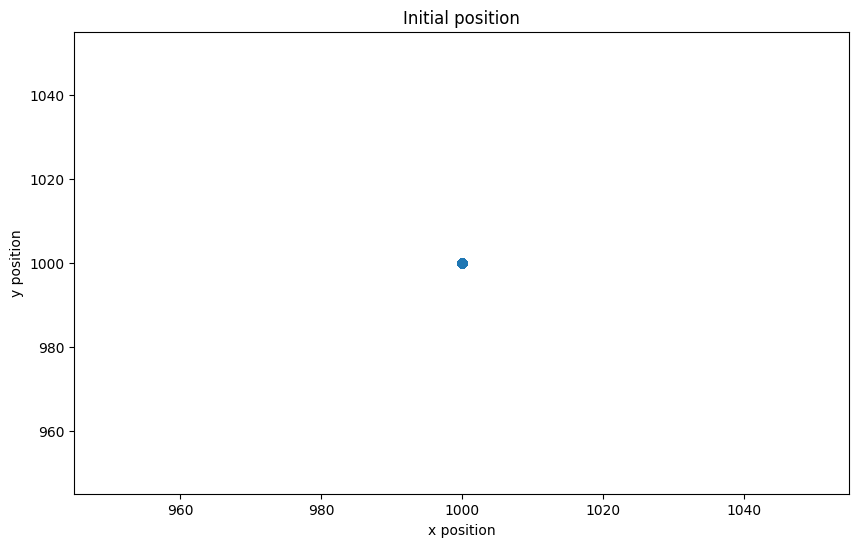

Numbers of steps: 130703


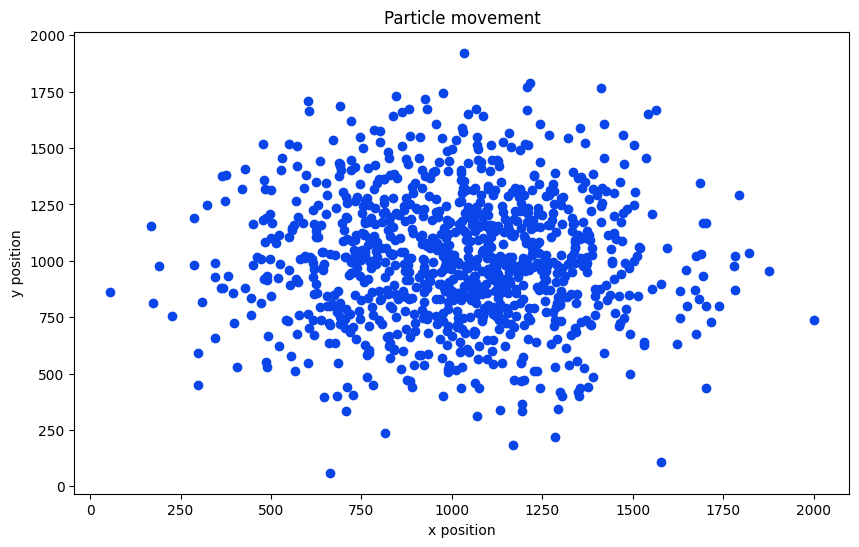

In [23]:
# Part 1. 2D Random Walk Model
# 1. Basic Model

simulation.initial()
simulation.simulation_move()

The basic model has 1000 particles positioned on a square grid centered at (1000,1000). At each time step the particles can move in the x and y direction or not move at all. When a particle's movement takes it beyond the boundary of the space $(0 ≤ x ≤ 2000, 0 ≤ y ≤ 2000)$, the simulation stops. In this case, the simulation stops after 130703 steps.

Sum of probabilities are: 1.0
Numbers of steps: 4197


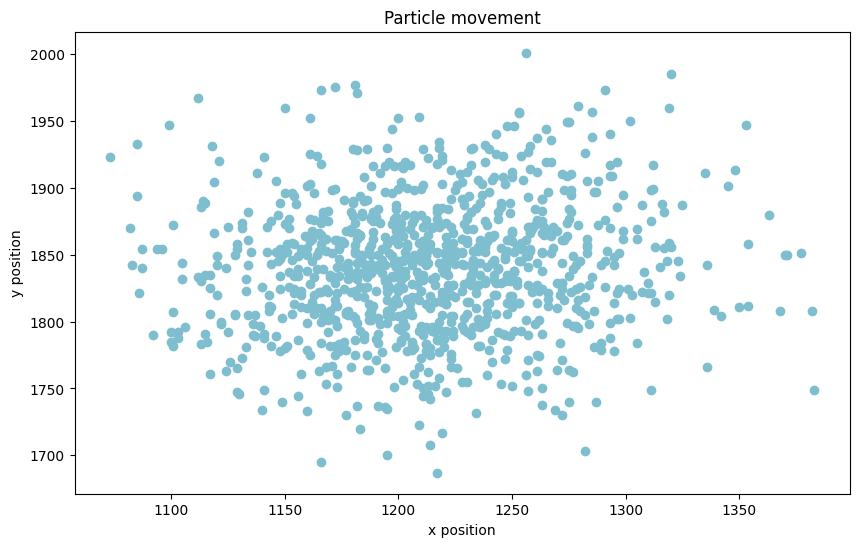

In [15]:
# 2. Probability-weighted model

simulation.simulation_move_diff_p()

In the first simulation every particle had a equal chance of moving in the x and y direction or not move at all. In this simulation, different probabilities have been added to each direction. This causes the simulation to stop after 4197 steps, which is when the first particle reaches the boundary.

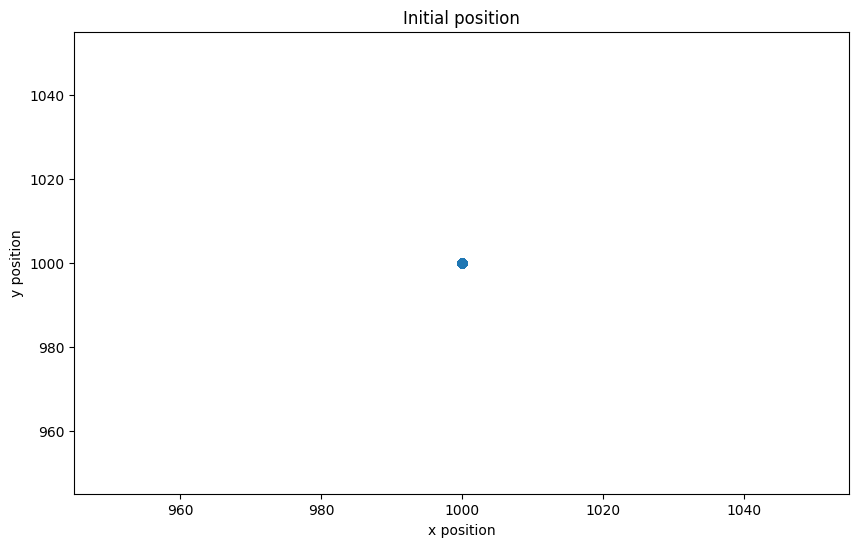

Numbers of steps: 100276


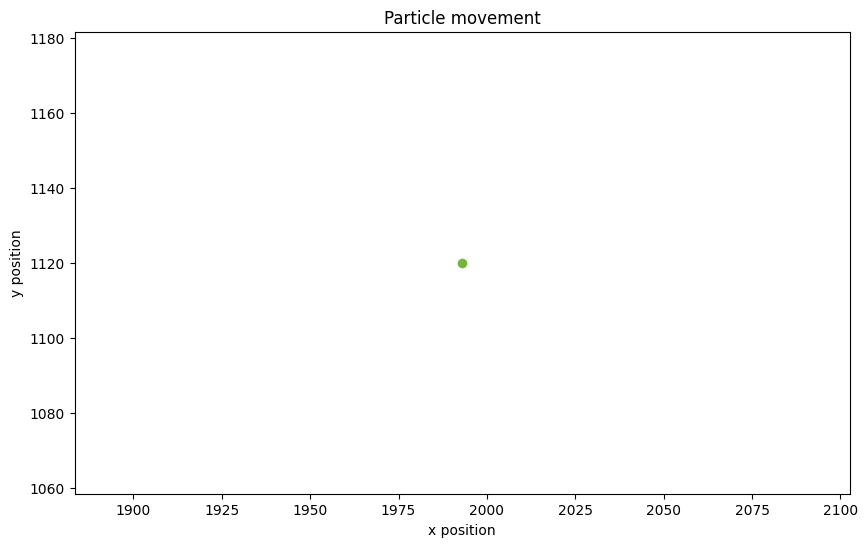

x position: 1993 
y position: 1120


In [16]:
# Part 2. 2D Random Walk Model of Contaminant Transport in Aquifers
# 1. Define Contaminant Source
# 2. Worst-Case Scenario

simulation.initial()
simulation.simulation_wc_scenario()

This simulation stops after 100276 steps with a x position: 1993 and y position: 1120. Using the euclidean distance formula, this is equal to a distance of 10km from the source.

Numbers of steps: 100276


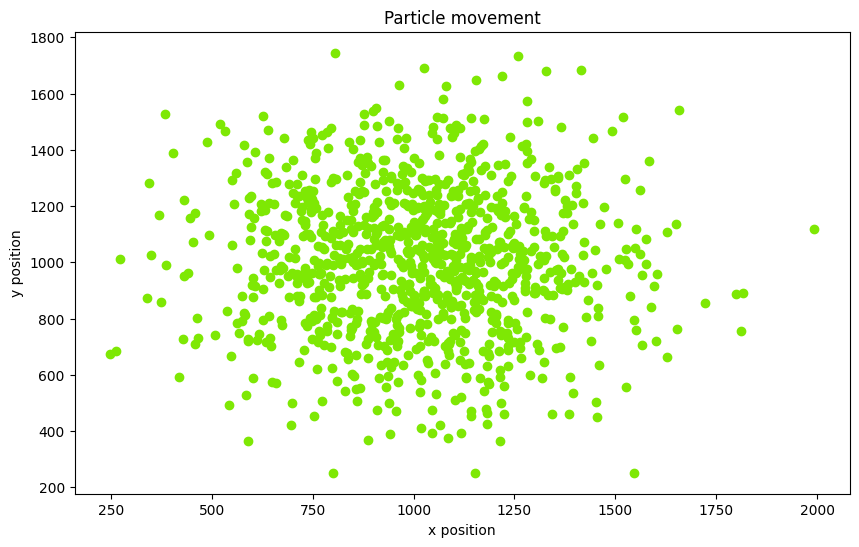

/var/folders/hd/rjkgpqd15sb8fjpp7d76twq80000gn/T/ipykernel_6200/2951224130.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='x_binned', columns='y_binned', aggfunc='size')


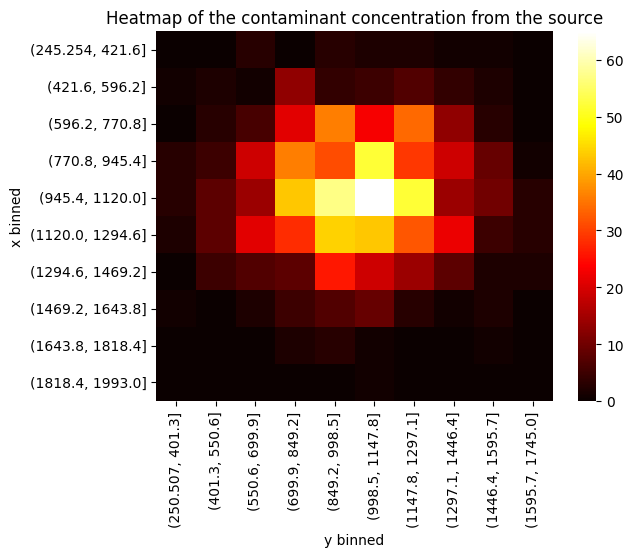

In [17]:
# 3. Simulate Contaminant Spread

x_pos, y_pos, counter, index = simulation.wc_scenario()
simulation.plot(x_pos, y_pos, counter)
df = pd.DataFrame({'x': x_pos, 'y': y_pos})

# Bin x and y positions
df['x_binned'] = pd.cut(df['x'], bins=10)
df['y_binned'] = pd.cut(df['y'], bins=10)

heatmap_data = df.pivot_table(index='x_binned', columns='y_binned', aggfunc='size')
sns.heatmap(heatmap_data, cmap='hot', cbar=True)
plt.title('Heatmap of the contaminant concentration from the source')
plt.xlabel('y binned')
plt.ylabel('x binned')
plt.show()


The heatmap shows the contaminant concentration from the source. Naturally, most particles are close to the center of the source. This can also be seen from the plot above the heatmap.

In [18]:
# 4. Time to Contaminate a Fixed Distance

steps = []
for i in range(10):
    x_pos, y_pos, counter, index = simulation.contaminate_fixed_distance()
    steps.append(counter)

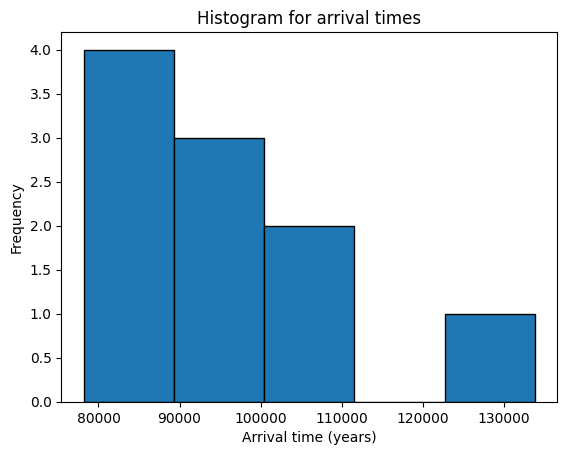

 The average time it takes for a particle to reach 10km from the source is: 96734.4 years


In [19]:
plt.hist(steps, bins = 'auto', edgecolor = 'black')
plt.title('Histogram for arrival times')
plt.xlabel('Arrival time (years)')
plt.ylabel('Frequency')
plt.show()

average_steps = np.sum(steps)/10
print(f' The average time it takes for a particle to reach 10km from the source is: {average_steps} years')

In this simulation, the arrival time of the first particle to reach the threshold has been simulated 10 times. The histogram shows the arrival times and the frequency. The average time it takes for a particle to reach a distance of 10km from the source is: $96734.4$ years.

In [20]:
# 5. Net Transport Effect

steps_nte = []
for i in range(100):
    x_pos, y_pos, counter, index = simulation.net_transport_effect()
    steps_nte.append(counter)

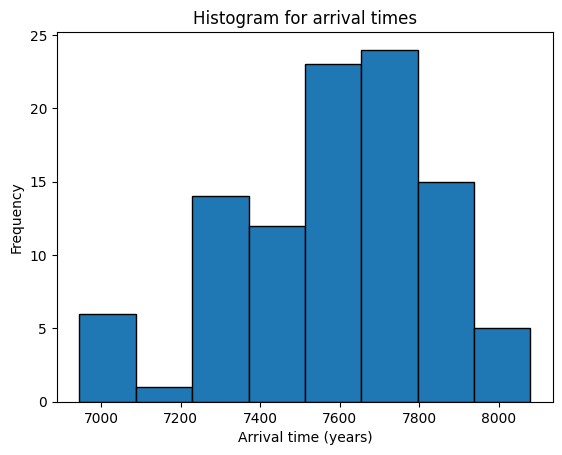

 The average time it takes for a particle to reach 10km from the source is: 7594.47 years


In [21]:
plt.hist(steps_nte, bins = 'auto', edgecolor = 'black')
plt.title('Histogram for arrival times')
plt.xlabel('Arrival time (years)')
plt.ylabel('Frequency')
plt.show()

average_steps = np.sum(steps_nte)/100
print(f' The average time it takes for a particle to reach 10km from the source is: {average_steps} years')

Here, new probabilities have been used to simulate the time it takes for the fastest particle to reach a distance of 10km from the source. The simulation was repeated 100 times and the average time it takes for a particle to reach a distance of 10km from the source is: $7594.47$ years.

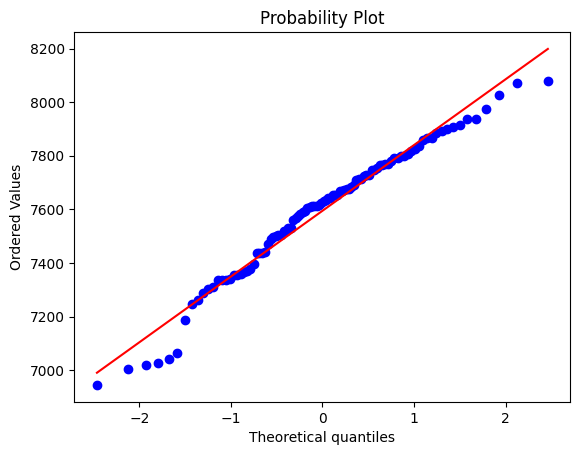

In [22]:
from scipy import stats

stats.probplot(steps_nte, dist='norm', plot=plt)
plt.show()

stats.probplot generates a probability plot of the data and compares it to the quantiles of a normal distribution [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html]. Data points along the red line implies that the data is approximately normally distributed. However, there are a few outliers at both ends. The arrival times appear to be approximately normally distributed.

**Summary**  
  
This project focuses on two exercises related to stochastic modeling and its applications in environmental engineering. The first exercise involves the stochastic modeling of interconnected mixing tanks. Using Monte Carlo methods, the exercise models uncertainty in the system's behavior, starting with a single tank and expanding to a three-tank system. The results are compared with ordinary differential equation (ODE) solutions to validate the stochastic approach. The second exercise applies a 2D random walk model to simulate the spread of contaminants in underground aquifers. This model mimics the diffusion process of contaminants and helps estimate the time required for the contaminant to reach specific distances under both worst-case and realistic scenarios. By modifying movement probabilities, the model also simulates the effects of groundwater flow on contaminant transport. The exercise compares the contamination risks in unbiased versus biased random walks, offering insights into the impact of directional transport on contamination spread and providing valuable knowledge for environmental risk assessment. Further improvement of the monte carlo project may involve exploring additional scenarios, such as varying tank volumes or flow rates and see the impact of the system's dynamics.

**References**  

1. <div id="stochastic"></div>Goicoechea, H. E., Lima, R., Sampaio, R., De Cursi, J. E. S., & De Cursi, J. E. S. (2023). Stochastic Analysis Involving the Computational Cost of a Monte-Carlo Simulation. In Proceedings of the 6th International Symposium on Uncertainty Quantification and Stochastic Modelling (pp. 130–140). Springer International Publishing AG. https://doi.org/10.1007/978-3-031-47036-3_12
2. <div id="walter"></div>Walter, J.-C., & Barkema, G. T. (2015). An introduction to Monte Carlo methods. Physica A, 418, 78–87. https://doi.org/10.1016/j.physa.2014.06.014  

3. SciPy. "scipy.stats.probplot." SciPy v1.11.2 Manual. Accessed December 13, 2024. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html.
